In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/tanneramman/Downloads/Mouse_metadata.csv"
study_results_path = "/Users/tanneramman/Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudyDf = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview

mouseStudyDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
# Checking the number of mice.
idLength = len(pd.unique(mouseStudyDf['Mouse ID']))
idLength

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = mouseStudyDf.loc[mouseStudyDf.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicateMice

array(['g989'], dtype=object)

In [22]:
#Get all the data for the duplicate mouse ID.
duplicateMiceData = mouseStudyDf.loc[mouseStudyDf['Mouse ID'] == 'g989', :]
duplicateMiceData
                                     

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMiceDf = mouseStudyDf[mouseStudyDf['Mouse ID'].isin(duplicateMice)== False]


In [29]:
# Checking the number of mice in the clean DataFrame.
idLength2 = len(pd.unique(cleanMiceDf['Mouse ID']))
idLength2


248

In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumorVolumeMean = cleanMiceDf.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumorVolumeMedian = cleanMiceDf.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumorVolumeVariance = cleanMiceDf.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumorVolumeStd = cleanMiceDf.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumorVolumeSem = cleanMiceDf.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumorVolumeStatsTable = pd.DataFrame({'Mean' : tumorVolumeMean,
                                     'Median' : tumorVolumeMedian,
                                     'Variance' : tumorVolumeVariance,
                                     'Standard Deviation' : tumorVolumeStd,
                                     'SEM' : tumorVolumeSem})
tumorVolumeStatsTable


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

tumorVolumeAgg = cleanMiceDf.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumorVolumeAgg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot: title={'center': 'Total Number of Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

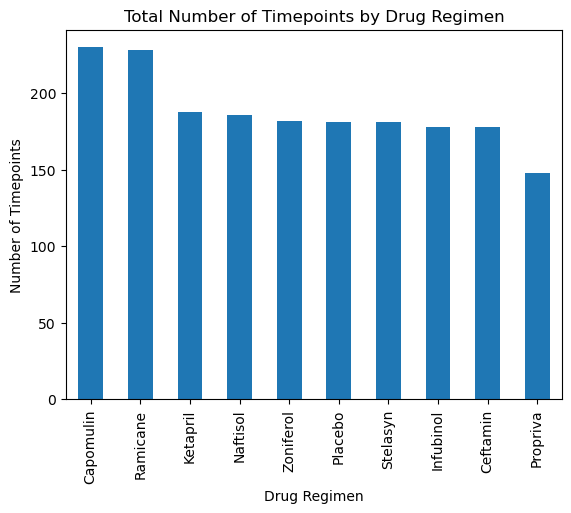

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepointsPerDrug = cleanMiceDf['Drug Regimen'].value_counts()

timepointsPerDrug.plot.bar(title = 'Total Number of Timepoints by Drug Regimen',  ylabel = 'Number of Timepoints', xlabel = 'Drug Regimen')



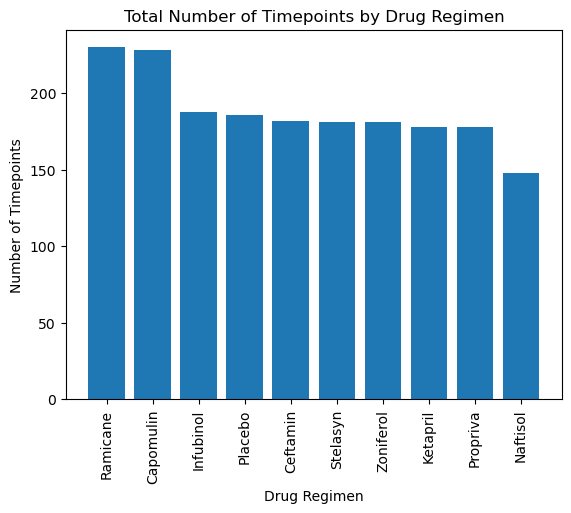

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

xAxis = cleanMiceDf['Drug Regimen'].unique()
numOfTimePoints = cleanMiceDf['Drug Regimen'].value_counts()

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.title('Total Number of Timepoints by Drug Regimen')

plt.bar(xAxis, numOfTimePoints)
plt.xticks(rotation=90)

plt.show()



<AxesSubplot: title={'center': 'Female vs. Male'}, ylabel='Sex'>

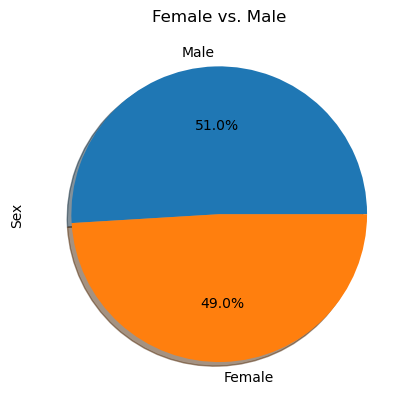

In [52]:
bySex = cleanMiceDf['Sex'].value_counts()


bySex.plot.pie(title = 'Female vs. Male', autopct="%1.1f%%", shadow= True)


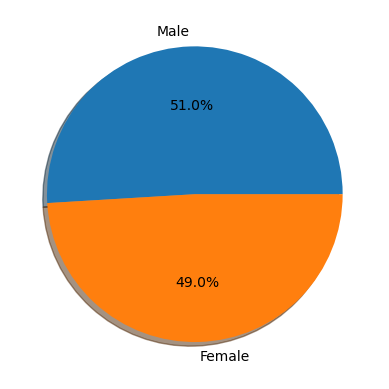

In [54]:
sexes = ["Male", "Female"]
differentSexes = cleanMiceDf['Sex'].value_counts()

plt.pie(differentSexes, labels = sexes, autopct="%1.1f%%", shadow= True)

plt.show()

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimepointByMouse = cleanMiceDf.groupby(['Mouse ID'])['Timepoint'].max()
greatestTimepointByMouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mergedMaxTimepoint = greatestTimepointByMouse.to_frame().merge(cleanMiceDf, on = ['Mouse ID', 'Timepoint'], how = 'left')
mergedMaxTimepoint.reset_index
mergedMaxTimepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [88]:
# Put treatments into a list for a for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeData = []
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rowsOfTreatment = mergedMaxTimepoint.loc[mergedMaxTimepoint['Drug Regimen'] == treatment]
    tumorVolumes = rowsOfTreatment['Tumor Volume (mm3)']
    tumorVolumeData.append(tumorVolumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolumes.quantile([.25,.5,.75])
    lowerQ = quartiles[.25]
    upperQ = quartiles[.75]
    iqr = upperQ - lowerQ
    lowerBound = lowerQ - (1.5*iqr)
    upperBound = upperQ + (1.5*iqr)
    
    outlier = tumorVolumes.loc[(tumorVolumes < lowerBound) | (tumorVolumes > upperBound)]
    print(f"{treatment}'s potential outliers: {outlier}")
    


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


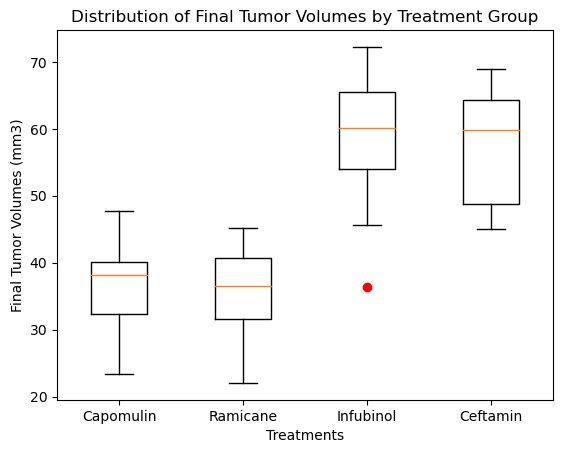

In [93]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumorVolumeData, labels = treatments, sym = 'r')
plt.xlabel('Treatments')
plt.ylabel('Final Tumor Volumes (mm3)')
plt.title('Distribution of Final Tumor Volumes by Treatment Group')
plt.show()



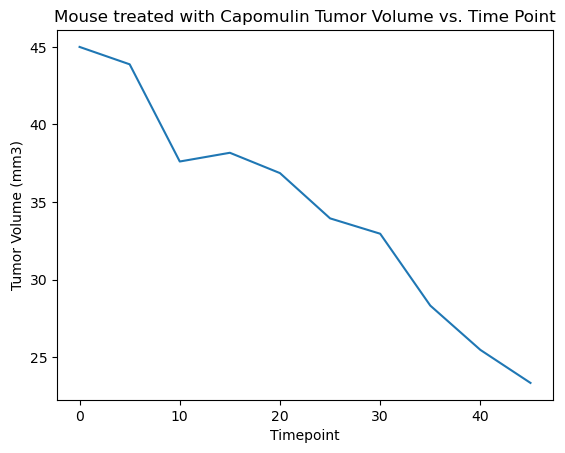

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capMouse = cleanMiceDf.loc[cleanMiceDf['Mouse ID'] == 's185']
xAxis = capMouse['Timepoint']
tumVolume = capMouse['Tumor Volume (mm3)']

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse treated with Capomulin Tumor Volume vs. Time Point')
plt.plot(xAxis, tumVolume)

plt.show()


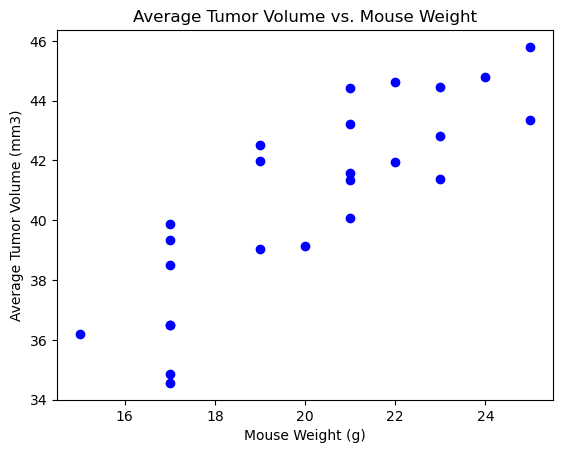

In [125]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capRegimen = cleanMiceDf.loc[cleanMiceDf['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()

xAxis = capRegimen['Weight (g)']
avgTumVolume = capRegimen['Tumor Volume (mm3)']

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.scatter(xAxis, avgTumVolume, marker = 'o', facecolors="blue")

plt.show()


The correlation between mouse weight and average tumor volume is 0.84
The linear regression line equation is y = 0.95 x + 21.55


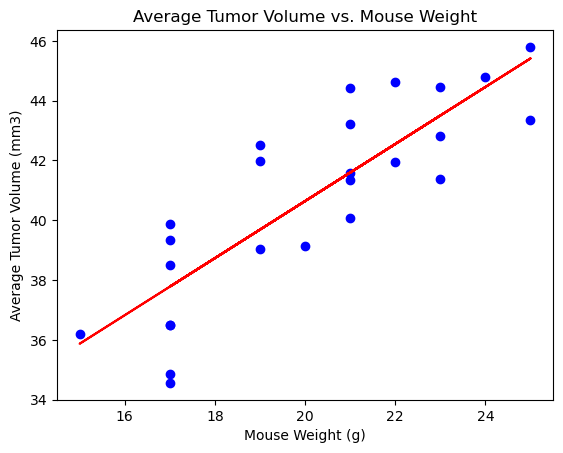

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

xAxis = capRegimen['Weight (g)']
avgTumVolume = capRegimen['Tumor Volume (mm3)']

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight')

plt.scatter(xAxis, avgTumVolume, marker = 'o', facecolors="blue")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xAxis, avgTumVolume)
regress = xAxis * slope + intercept
lineEquation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(xAxis, regress, color = 'r')

print(f"The correlation between mouse weight and average tumor volume is {round(rvalue, 2)}")
print(f"The linear regression line equation is {lineEquation}")
plt.show()
